## Data preparation

In [7]:
import numpy as np
import pprint
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

FILE = 'datasets/101_ObjectCategories/bin/dataset_batch_0'
LABEL_FILE = 'datasets/101_ObjectCategories/bin/label_names'

def load_data(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def choose_random_data_entries(dataset, num_chosen_data_entries=1):
    data_entries = [{'data': dataset['data'][indx], 'label': dataset['labels'][indx]} for indx in (random.randrange(0, dataset['data'].shape[0]) for _ in range(num_chosen_data_entries))]
    return data_entries

def display_data_entries(data_entries, label_names, subplot_layout):
    for data_entry in data_entries:
        plt.imshow(data_entry['data'].reshape((299, 299, 3)))
        print(label_names[data_entry['label']])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
label_names = load_data(LABEL_FILE)

beaver


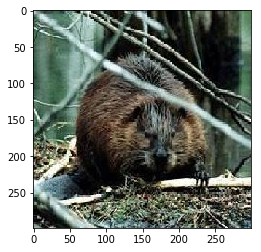

In [45]:
#plot_model(inception_v4, to_file="Inception-v4.png", show_shapes=True)
dataset = load_data(FILE)
dataset['data'] = dataset['data'].reshape((1000, 299, 299, 3))
#Choose randomly a list of images and their corresponding labels
data_entries = choose_random_data_entries(dataset, 1)

display_data_entries(data_entries, label_names, (1,1))
plt.show()

In [12]:
32*32*3

3072

## Inception V4

In [16]:
#from keras.utils import plot_model
from inception_v4 import create_inception_v4

In [17]:
inception_v4 = create_inception_v4(nb_classes=101, load_weights=False)

inception_v4.summary()

/home/sicli01/Projects/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(2, 2), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/home/sicli01/Projects/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/home/sicli01/Projects/Inception-v4/inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/home/sicli01/Projects/Inception-v4/inception_v4.py:42: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `Max

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_5 (Conv2D)                (None, 149, 149, 32)  864         input_5[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  128         conv2d_5[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

### Training

In [9]:
inception_v4.compile('sgd', 'categorical_crossentropy', )

In [10]:
print(np.max(dataset['labels']))

101


In [11]:
print(dataset['data'].shape)
# Target output of the model
_y = np.zeros((1000, 101))
_y[np.arange(1000), dataset['labels'] - 1] = 1

(1000, 299, 299, 3)


In [26]:
history = inception_v4.fit(x=dataset['data'], y=_y, validation_split=0.1, epochs=2000, verbose=2)

Train on 900 samples, validate on 100 samples
Epoch 1/2000
1275s - loss: 4.8548 - val_loss: 13.4190
Epoch 2/2000
1275s - loss: 4.6226 - val_loss: 12.4483
Epoch 3/2000
1273s - loss: 4.5197 - val_loss: 12.1248
Epoch 4/2000
1277s - loss: 4.2787 - val_loss: 10.2141
Epoch 5/2000


KeyboardInterrupt: 

### Predict

Predicted label: dragonfly
True label: airplanes


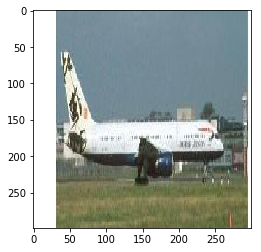

In [30]:
for data_entry in data_entries:
    plt.imshow(data_entry['data'].reshape((299, 299, 3)))
    y = inception_v4.predict(data_entry['data'].reshape((-1, 299, 299, 3)))
    #print(y[0].shape)
    print("Predicted label: " + label_names[np.argmax(y[0])])
    print("True label: " + label_names[data_entry['label']])
plt.show()

## VGG16

In [4]:
#from keras.utils import plot_model
from vgg16 import create_vgg16

In [8]:
vgg16_net = create_vgg16(nb_classes=101, load_weights=False)

vgg16_net.summary()

/home/sicli01/Projects/Inception-v4/vgg16.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/home/sicli01/Projects/Inception-v4/vgg16.py:28: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="valid", strides=(2, 2))`
  x2 = MaxPooling2D((2, 2), strides=(2, 2), border_mode='valid')(x1)
/home/sicli01/Projects/Inception-v4/vgg16.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
/home/sicli01/Projects/Inception-v4/vgg16.py:32: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="valid", strides=(2, 2))`
  x3 = MaxPooling2D((2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      1728      
_________________________________________________________________
activation_40 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 224, 224, 64)      36864     
_________________________________________________________________
activation_41 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     73728     
__________

/home/sicli01/Projects/Inception-v4/vgg16.py:58: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=101)`
  out = Dense(output_dim=nb_classes, activation='softmax')(init)
